In [ ]:
# ANALYST:    PATRICIA P. MAUMBA
# DUE DATE:   JULY 30, 2024
# Detailed analysis on survival prediction

In [5]:
# import required packages and set universal options
import pandas as pd
from sklearn import model_selection as skms
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn import metrics
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression

# To make sure our transformed data remains in a dataframe
set_config(transform_output="pandas")

# Limit notebook display and pandas output decimals
%precision 4
pd.options.display.precision = 3

# load the Titanic_data.
titanic = pd.read_csv("../data/Titanic_data.csv")
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.000,C39,S
1,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.000,NaN,S
2,0,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.000,NaN,S
3,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.000,B51 B53 B55,S
4,0,3,"Lockyer, Mr. Edward",male,NaN,0,0,1222,7.879,NaN,S


In [8]:
# Subsetting data to get selected columns such as survived, pclass, sex, parch, and sibsp columns.
titanic_survived = titanic[['survived', 'pclass', 'sex', 'parch', 'sibsp']]
titanic_survived.head()

# apply one hot encoding for the 'sex' categorical feature
titanic_survived = pd.get_dummies(titanic_survived, columns=['sex'], drop_first=True )
titanic_survived

,survived,pclass,parch,sibsp,sex_male
0,0,1,0,0,True
1,0,1,0,0,True
2,0,1,0,0,True
3,0,1,0,0,True
4,0,3,0,0,True
...,...,...,...,...,...
1304,0,1,0,1,True
1305,1,1,0,1,False
1306,0,2,0,0,True
1307,0,1,1,1,True


In [9]:
# Data preparation for modeling
# Set values of constants
TEST_SIZE = 0.1
RANDOM_STATE = 1066
TARGET = 'survived'

# Separate the target and features in the dataframe
target = titanic_survived[TARGET]
features = titanic_survived.drop(columns=[TARGET])

# Split the data in both target and features into train & test sets
(train_ftrs, test_ftrs,
 train_target, test_target) = skms.train_test_split(features,
                                                    target, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE)

# standardizing features after train/test split using StandardScaler function
stdsc = StandardScaler()
train_ftrs = stdsc.fit_transform(train_ftrs)
test_ftrs = stdsc.transform(test_ftrs)

Creating and evaluating a naive Bayes model.

              precision    recall  f1-score   support

           0     0.8590    0.7283    0.7882        92
           1     0.5283    0.7179    0.6087        39

    accuracy                         0.7252       131
   macro avg     0.6936    0.7231    0.6985       131
weighted avg     0.7605    0.7252    0.7348       131



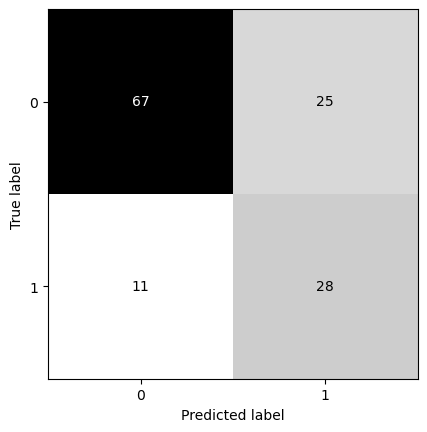

In [12]:
# Lets run the NB model using the Gaussian algorithm & make prediction
nb    = naive_bayes.GaussianNB()
model = nb.fit(train_ftrs, train_target)
preds = model.predict(test_ftrs)

# Display the confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target, preds,
                                                colorbar=False,
                                                cmap='Greys')

# Display the classification report
print(metrics.classification_report(test_target,preds, digits=4))

In [15]:
# Lets create a df with predicted and actual values
results = pd.DataFrame(preds, columns=['predicted'])

# add the actual values
results['actual'] = test_target.reset_index(drop=True)
results.info()

# Lets look at all the rows the model got wrong.
results[results['predicted'] != results['actual']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   predicted  131 non-null    int64
 1   actual     131 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


,predicted,actual
2,0,1
10,1,0
19,1,0
22,0,1
25,0,1
30,1,0
34,1,0
39,0,1
40,0,1
48,0,1


Creating and evaluating a logistic regression model.

              precision    recall  f1-score   support

           0     0.8542    0.8913    0.8723        92
           1     0.7143    0.6410    0.6757        39

    accuracy                         0.8168       131
   macro avg     0.7842    0.7662    0.7740       131
weighted avg     0.8125    0.8168    0.8138       131



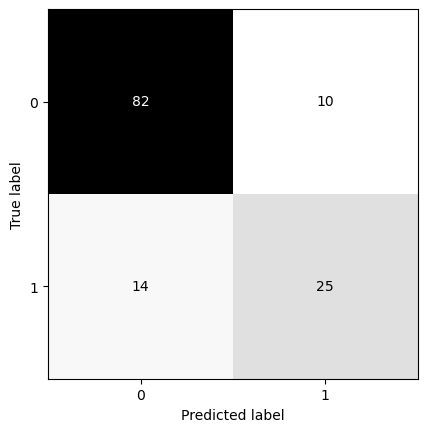

In [16]:
# Lets create and fit the logistic regression model for evaluation
logreg = LogisticRegression(random_state=RANDOM_STATE)
model = logreg.fit(train_ftrs, train_target)
preds = model.predict(test_ftrs)

# Display the confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target, preds,
                                                colorbar=False,
                                                cmap='Greys')

# Display the classification report
print(metrics.classification_report(test_target,preds, digits=4))

In [17]:
# Lets create a df with predicted and actual values
results = pd.DataFrame(preds, columns=['predicted'])

# add the actual values
results['actual'] = test_target.reset_index(drop=True)
results.info()

# Lets look at all the rows the model got wrong.
results[results['predicted'] != results['actual']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   predicted  131 non-null    int64
 1   actual     131 non-null    int64
dtypes: int64(2)
memory usage: 2.2 KB


,predicted,actual
2,0,1
10,1,0
19,1,0
22,0,1
25,0,1
30,1,0
34,1,0
39,0,1
40,0,1
48,0,1


Analysis: Compare the results. Which model appears to do a better job of predicting passenger survival?
- The Logistic Regression model has a better prediction accuracy of 81.68% while the Naive Bayes fall under by 72.52% accuracy.
- Also, the logistic regression model has a higher recall for predicting no survival.